In [16]:
import mrcfile
import numpy as np
from ClassFiles.AdversarialRegularizer import AdversarialRegulariser
from ClassFiles.ut import getRecos, find
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
train_list_sgd_001 = getRecos('01', 'EM', eval_data=True, iter='All')
train_list_sgd_0016 = getRecos('016', 'SGD')
train_list_sgd_002 = getRecos('02', 'SGD')
train_list_em_001 = getRecos('01', 'EM')
train_list_em_0016 = getRecos('016', 'EM')
train_list_em_002 = getRecos('02', 'EM')

In [2]:
noise_levels = ['01', '016', '02']
methodes = ['EM', 'SGD']

In [3]:
def get_dic(noise_levels, methodes, eval_data):
    train_dic = {}
    for nl in noise_levels:
        train_dic[nl] = {}
        for met in methodes:
            if met == 'EM':
                train_dic[nl][met] = getRecos(nl, met, eval_data=eval_data, iter='All')
            elif met == 'SGD':
                train_dic[nl][met] = getRecos(nl, met, eval_data=eval_data, iter='Final')
            else:
                raise ValueError('Enter valid noise level')
    return train_dic

In [4]:
train_dic = get_dic(noise_levels, methodes, eval_data=False)
eval_dic = get_dic(noise_levels, methodes, eval_data=True)

In [5]:
l_1 = train_dic['01']['SGD']
print(len(l_1))

30


In [6]:
random.choice(l_1)

'/local/scratch/public/sl767/MRC_Data/Data/Data_001_10k/train/SGD/3RJK/3RJK_mult001_it300_class001.mrc'

In [12]:
BASE_PATH = '/local/scratch/public/sl767/MRC_Data/'
DATA_PATH = BASE_PATH + 'Data/'
GT_PATH = BASE_PATH + 'org/'

def locate_gt(path, full_path=True):
    """filename in path should start with pdb_id"""
    if full_path:
        pdb_id = path.split('/')[-1][:4]
    else:
        pdb_id = path
    L = find('*' + pdb_id + '.mrc', GT_PATH)
    if not len(L) == 1:
        raise ValueError('non-unique pdb id: ' + str(L))
    else:
        return L[0]

def get_image(noise_level, methode, eval_data):
    if eval_data:
        d = eval_dic
    else:
        d = train_dic
    l = d[noise_level][methode]
    adv_path = random.choice(l)
    
    with mrcfile.open(adv_path) as mrc:
        adv = mrc.data
    with mrcfile.open(locate_gt(adv_path)) as mrc:
        gt = mrc.data
    return gt, adv


In [38]:
gt, adv = get_image('02', 'SGD', False)

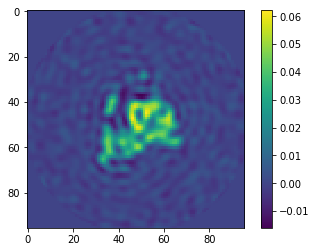

In [39]:
plt.imshow(adv[...,45])
plt.colorbar()

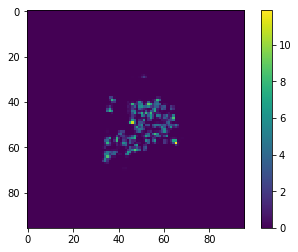

In [40]:
plt.imshow(gt[...,45])
plt.colorbar()

In [47]:
BATCH_SIZE = 1
def get_batch(eval_data=False):
    true = np.zeros(shape=(BATCH_SIZE, 96,96,96))
    adv = np.zeros(shape=(BATCH_SIZE, 96,96,96))
    for k in range(BATCH_SIZE):
        nl = random.choice(noise_levels)
        methode = random.choice(methodes)
        gt, adver = get_image(nl, methode, eval_data)
        true[k, ...] = gt
        adv[k, ...] = adver
    return true, adv

In [48]:

gt, adv = get_batch()

# Summary

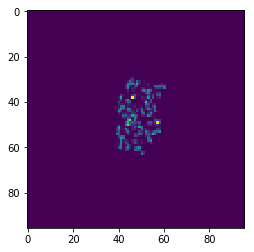

In [52]:
plt.imshow(gt[0,...,45])